In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model

In [4]:
df=pd.read_csv("TCS.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [5]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [6]:
df.shape

(4139, 14)

In [7]:
df.isnull().values.any()

True

<AxesSubplot: xlabel='Date'>

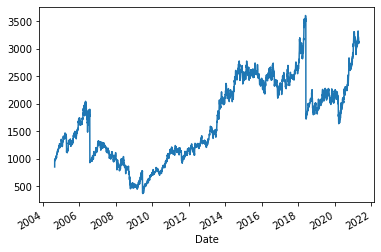

In [8]:
df['Prev Close'].plot()

In [9]:
features = ['Open', 'High', 'Low', 'Volume']
output_var = pd.DataFrame(df['Prev Close'])

In [10]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2004-08-25,0.256876,0.248995,0.193184,0.388457
2004-08-26,0.193568,0.187819,0.192033,0.114439
2004-08-27,0.190628,0.183391,0.186822,0.086616
2004-08-30,0.186799,0.185696,0.188829,0.069063
2004-08-31,0.191884,0.185696,0.192251,0.059774


In [11]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [12]:
import tensorflow

In [13]:
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


In [14]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100

471/471 [==============================] - 2s 2ms/step - loss: 3095963.7500
Epoch 2/100
471/471 [==============================] - 1s 2ms/step - loss: 3002994.0000
Epoch 3/100
471/471 [==============================] - 1s 2ms/step - loss: 2844246.7500
Epoch 4/100
471/471 [==============================] - 1s 2ms/step - loss: 2643586.2500
Epoch 5/100
471/471 [==============================] - 1s 2ms/step - loss: 2414888.2500
Epoch 6/100
471/471 [==============================] - 1s 2ms/step - loss: 2168744.2500
Epoch 7/100
471/471 [==============================] - 1s 2ms/step - loss: 1914045.7500
Epoch 8/100
471/471 [==============================] - 1s 2ms/step - loss: 1658522.8750
Epoch 9/100
471/471 [==============================] - 1s 2ms/step - loss: 1408970.7500
Epoch 10/100
471/471 [==============================] - 1s 2ms/step - loss: 1171366.2500
Epoch 11/100
471/471 [==============================] - 1s 2ms/step - loss: 950882.5000
Epoch 12/100
471/471 [========

471/471 [==============================] - 1s 2ms/step - loss: 1544.9252
Epoch 93/100
471/471 [==============================] - 1s 2ms/step - loss: 1544.2126
Epoch 94/100
471/471 [==============================] - 1s 2ms/step - loss: 1543.4801
Epoch 95/100
471/471 [==============================] - 1s 2ms/step - loss: 1542.7246
Epoch 96/100
471/471 [==============================] - 1s 2ms/step - loss: 1541.9463
Epoch 97/100
471/471 [==============================] - 1s 2ms/step - loss: 1541.1437
Epoch 98/100
471/471 [==============================] - 1s 2ms/step - loss: 1540.3185
Epoch 99/100
471/471 [==============================] - 1s 2ms/step - loss: 1539.4672
Epoch 100/100
471/471 [==============================] - 1s 2ms/step - loss: 1538.5930


In [18]:
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
y_pred= lstm.predict(X_test)

12/12 [==============================] - 0s 2ms/step


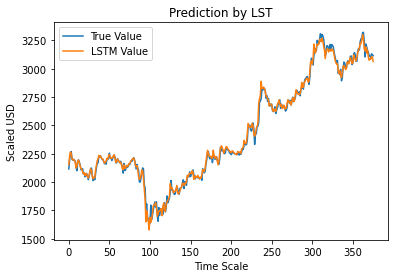

In [21]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LST')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()